<a href="https://colab.research.google.com/github/mmsiqueira98/Pinguins/blob/main/Pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Aprendizado de Máquina
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Teoria;</li>
  <li>Atributos categóricos;</li>
  <li>Atributos numéricos;</li>
  <li>Dados faltantes.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é preparar a base de dados para prever a espécie do penguin (variável resposta) baseado em suas características físicas e geográficas (variáveis preditivas).

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import warnings
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [4]:
"""
Os valores que foram retirados a média

"""
bill_lenght = data['bill_length_mm'].mean()
bill_depth = data['bill_depth_mm'].mean()
flipper_lenght = data['flipper_length_mm'].mean()
body_mass = data['body_mass_g'].mean()

data['bill_length_mm'].fillna(bill_lenght, inplace=True)
data['bill_depth_mm'].fillna(bill_depth, inplace=True)
data['flipper_length_mm'].fillna(flipper_lenght, inplace=True)
data['body_mass_g'].fillna(body_mass, inplace=True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
data.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female
3,Adelie,Torgersen,43.92,17.15,200.92,4201.75,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female
5,Adelie,Torgersen,39.30,20.60,190.00,3650.00,Male
6,Adelie,Torgersen,38.90,17.80,181.00,3625.00,Female
7,Adelie,Torgersen,39.20,19.60,195.00,4675.00,Male
8,Adelie,Torgersen,34.10,18.10,193.00,3475.00,NaN
9,Adelie,Torgersen,42.00,20.20,190.00,4250.00,NaN


### **1.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [6]:
#Bill Length

bill_lenght_mean = data['bill_length_mm'].mean()
bill_lenght_std= data['bill_length_mm'].std()
data['bill_length_std'] = data['bill_length_mm'].apply(lambda x: (x-bill_lenght_mean)/(bill_lenght_std))

#Bill Depth

bill_depth_mean = data['bill_length_mm'].mean()
bill_depth_std= data['bill_length_mm'].std()
data['bill_depth_std'] = data['bill_depth_mm'].apply(lambda x: (x-bill_depth_mean)/(bill_depth_std))

#Flipper Length
flipper_length_mean = data['flipper_length_mm'].mean()
flipper_length_std= data['flipper_length_mm'].std()
data['flipper_length_std'] = data['flipper_length_mm'].apply(lambda x: (x-flipper_length_mean)/(flipper_length_std))

#Body Mass
body_mass_mean = data['body_mass_g'].mean()
body_mass_std= data['body_mass_g'].std()
data['body_mass_std'] = data['body_mass_g'].apply(lambda x: (x-body_mass_mean)/(body_mass_std))

In [7]:
data.head(100)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_std,bill_depth_std,flipper_length_std,body_mass_std
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male,-0.89,-4.63,-1.42,-0.56
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female,-0.81,-4.87,-1.06,-0.50
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female,-0.67,-4.76,-0.42,-1.19
3,Adelie,Torgersen,43.92,17.15,200.92,4201.75,NaN,-0.00,-4.92,0.00,0.00
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female,-1.33,-4.52,-0.56,-0.94
...,...,...,...,...,...,...,...,...,...,...,...
95,Adelie,Dream,40.80,18.90,208.00,4300.00,Male,-0.57,-4.60,0.51,0.12
96,Adelie,Dream,38.10,18.60,190.00,3700.00,Female,-1.07,-4.65,-0.78,-0.63
97,Adelie,Dream,40.30,18.50,196.00,4350.00,Male,-0.67,-4.67,-0.35,0.19
98,Adelie,Dream,33.10,16.10,178.00,2900.00,Female,-1.99,-5.11,-1.63,-1.63


### **1.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [8]:
data['species'].drop_duplicates()
species_ord = {
    "Adelie": 1,
    "Chinstrap": 2,
    "Gentoo": 3,
}
data['species_ord'] = data['species'].map(species_ord)

In [9]:
species_ord = {
    "Adelie": 1,
    "Chinstrap": 2,
    "Gentoo": 3,
}
data['species_ord'] = data['species'].map(species_ord)

In [10]:
data['island'].drop_duplicates()

0     Torgersen
20       Biscoe
30        Dream
Name: island, dtype: object

In [11]:
island_ord = {
    "Torgersen": 1,
    "Biscoe": 2,
    "Dream": 3,
}
data['island_ord'] = data['island'].map(island_ord)

In [12]:
data['sex_ord'] = data['sex'].apply(lambda sex: 1 if sex =='Male' else 0)

Nessa Parte o ideal não seria manter as os valores mais ou menos equilibrados? 

In [13]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_std,bill_depth_std,flipper_length_std,body_mass_std,species_ord,island_ord,sex_ord
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male,-0.89,-4.63,-1.42,-0.56,1,1,1
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female,-0.81,-4.87,-1.06,-0.50,1,1,0
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female,-0.67,-4.76,-0.42,-1.19,1,1,0
3,Adelie,Torgersen,43.92,17.15,200.92,4201.75,NaN,-0.00,-4.92,0.00,0.00,1,1,0
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female,-1.33,-4.52,-0.56,-0.94,1,1,0


### **1.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [14]:

data.drop('bill_length_mm', axis=1, inplace=True)
data.drop('bill_depth_mm', axis=1, inplace=True)
data.drop('flipper_length_mm', axis=1, inplace=True)
data.drop('sex', axis=1, inplace=True)


In [16]:
data.drop('sex', axis = 1, inplace=True)

In [18]:
data.drop('species', axis=1, inplace=True)
data.drop('island', axis=1, inplace=True)

In [19]:
data.head(10)

,body_mass_g,bill_length_std,bill_depth_std,flipper_length_std,body_mass_std,species_ord,island_ord,sex_ord
0,3750.00,-0.89,-4.63,-1.42,-0.56,1,1,1
1,3800.00,-0.81,-4.87,-1.06,-0.50,1,1,0
2,3250.00,-0.67,-4.76,-0.42,-1.19,1,1,0
3,4201.75,-0.00,-4.92,0.00,0.00,1,1,0
4,3450.00,-1.33,-4.52,-0.56,-0.94,1,1,0
5,3650.00,-0.85,-4.28,-0.78,-0.69,1,1,1
6,3625.00,-0.92,-4.80,-1.42,-0.72,1,1,0
7,4675.00,-0.87,-4.47,-0.42,0.59,1,1,1
8,3475.00,-1.80,-4.74,-0.56,-0.91,1,1,0
9,4250.00,-0.35,-4.36,-0.78,0.06,1,1,0


#Treino

In [24]:
model = LinearRegression()

In [20]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['species_ord'], axis=1),
    data['species_ord'],
    test_size = 0.33,
    random_state = 123
)

In [21]:
data.shape

(344, 8)

In [22]:
predictors_train.shape

(230, 7)

In [25]:
model = model.fit(predictors_test, target_test)

In [26]:
target_test

309    3
234    3
143    1
20     1
190    2
      ..
288    3
277    3
15     1
24     1
173    2
Name: species_ord, Length: 114, dtype: int64

In [27]:
a = model.coef_
a

array([ 2.25162001e-04,  3.89080837e-01, -9.54379085e-01,  1.76370831e-01,
        2.81588700e-07,  5.79760728e-02, -2.43666780e-01])

In [28]:
b = model.intercept_
b

-3.716280911204791

In [29]:
data.head(1)

,body_mass_g,bill_length_std,bill_depth_std,flipper_length_std,body_mass_std,species_ord,island_ord,sex_ord
0,3750.00,-0.89,-4.63,-1.42,-0.56,1,1,1


#RMSE

In [30]:
target_predicted = model.predict(predictors_test)

In [31]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print((rmse))

0.20587292570344404


In [32]:
predictors_train.head()

,body_mass_g,bill_length_std,bill_depth_std,flipper_length_std,body_mass_std,island_ord,sex_ord
238,4800.00,0.42,-5.40,0.58,0.75,2,0
80,3200.00,-1.71,-4.91,-0.85,-1.25,1,0
254,5150.00,0.95,-5.35,1.36,1.19,2,0
203,3950.00,1.37,-4.58,0.01,-0.31,3,1
152,3500.00,0.47,-4.78,-0.64,-0.88,3,0


In [33]:
target_train.head()

238    3
80     1
254    3
203    2
152    2
Name: species_ord, dtype: int64

##Árvore de Decisão

In [34]:
model = DecisionTreeRegressor()
model = model.fit(predictors_train, target_train)

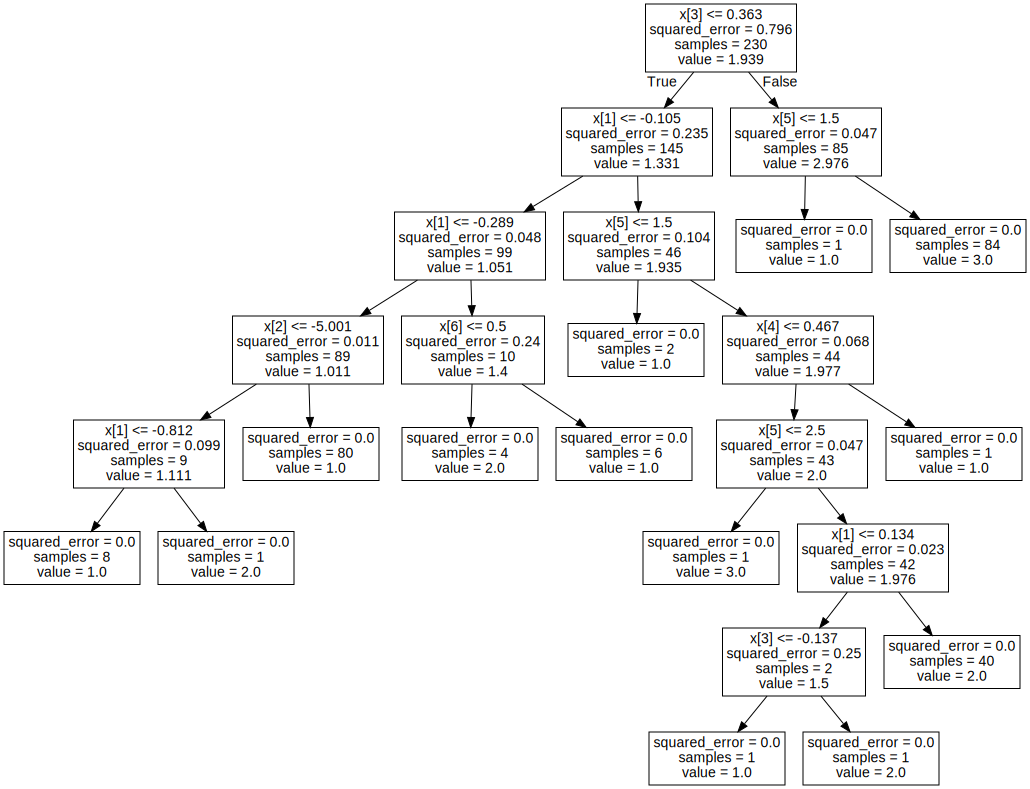

In [35]:
tree_data = tree.export_graphviz(model, out_file = None)
graph = graphviz.Source(tree_data)
graph

#Novo Pinguin

In [36]:
data.head(1)

,body_mass_g,bill_length_std,bill_depth_std,flipper_length_std,body_mass_std,species_ord,island_ord,sex_ord
0,3750.00,-0.89,-4.63,-1.42,-0.56,1,1,1


In [38]:
bill_length_new_p = (38.2 - bill_lenght_mean) / (bill_lenght_std)
bill_depth_new_p  = (18.1 - bill_depth_mean) / (bill_depth_std)
flipper_length_new_p = (185.0 - flipper_length_mean) / (flipper_length_std)
body_mass_new_p = (3950.0 - body_mass_mean) / (body_mass_std)


In [48]:
warnings.filterwarnings("ignore", category=UserWarning)
especie = np.array([3950.00, bill_length_new_p, bill_depth_new_p, flipper_length_new_p, body_mass_new_p, 2, 1])
especie = model.predict(especie.reshape(1, -1))
a = int(especie)
for species, value in species_ord.items():
    if value == a:
        print(species)

Adelie
